Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
# Write your code for AIM #1 here
import pandas as pd
import time
import numpy as np

start_time_pandas = time.time()

data_pandas = pd.Series(np.random.randint(1, 101, size=1000000))

end_time_pandas = time.time()

time_taken_pandas = end_time_pandas - start_time_pandas
print(f"Time taken using pandas: {time_taken_pandas} seconds")

start_time_numpy = time.time()

data_numpy = np.random.randint(1, 101, size=1000000)

end_time_numpy = time.time()

time_taken_numpy = end_time_numpy - start_time_numpy
print(f"Time taken using NumPy: {time_taken_numpy} seconds")

if time_taken_pandas < time_taken_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")


Time taken using pandas: 0.010460376739501953 seconds
Time taken using NumPy: 0.006819725036621094 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [18]:
# Write your code for AIM #2 here

import pandas as pd
import time
import numpy as np
# Loading the CSV file as an array in NumPy
data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=0, dtype=None, encoding='utf-8', names=True)


# Create separate arrays for the individual columns that you want to operate on
# For example, to create a separate array for 'Age' column
age = data['Age'].astype(int)

start_time_pandas = time.time()
df = pd.read_csv('sleep_health.csv')
print(df.columns)
mean_sleep_duration = df['Sleep Duration'].mean()
mean_systolic_bp = df['Systolic blood pressure'].mean()
mean_diastolic_bp = df['Diastolic blood pressure'].mean()
mean_heart_rate = df['Heart Rate'].mean()
mean_daily_steps = df['Daily Steps'].mean()

end_time_pandas = time.time()
time_taken_pandas = end_time_pandas - start_time_pandas

print(f"Mean Sleep Duration: {mean_sleep_duration}")
print(f"Mean Systolic Blood Pressure: {mean_systolic_bp}")
print(f"Mean Diastolic Blood Pressure: {mean_diastolic_bp}")
print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Mean Daily Steps: {mean_daily_steps}")
print(f"Time taken using pandas: {time_taken_pandas} seconds")

sleep_duration = data['Sleep_Duration']
systolic_bp = data['Systolic_blood_pressure']
diastolic_bp = data['Diastolic_blood_pressure']
heart_rate = data['Heart_Rate']
daily_steps = data['Daily_Steps']

start_time_numpy = time.time()

mean_sleep_duration = np.mean(sleep_duration)
mean_systolic_bp = np.mean(systolic_bp)
mean_diastolic_bp = np.mean(diastolic_bp)
mean_heart_rate = np.mean(heart_rate)
mean_daily_steps = np.mean(daily_steps)

end_time_numpy = time.time()
time_taken_numpy = end_time_numpy - start_time_numpy

print(f"Mean Sleep Duration: {mean_sleep_duration}")
print(f"Mean Systolic Blood Pressure: {mean_systolic_bp}")
print(f"Mean Diastolic Blood Pressure: {mean_diastolic_bp}")
print(f"Mean Heart Rate: {mean_heart_rate}")
print(f"Mean Daily Steps: {mean_daily_steps}")
print(f"Time taken using NumPy: {time_taken_numpy} seconds")


# Calculate correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

print(f"Correlation matrix:\n{correlation_matrix}")

# Separate correlations
correlation_sleep_age = df['Sleep Duration'].corr(df['Age'])
correlation_sleep_heart_rate = df['Sleep Duration'].corr(df['Heart Rate'])
correlation_sleep_daily_steps = df['Sleep Duration'].corr(df['Daily Steps'])

print(f"Correlation matrix:\n{correlation_matrix}")
print(f"Correlation between Sleep Duration and Age: {correlation_sleep_age}")
print(f"Correlation between Sleep Duration and Heart Rate: {correlation_sleep_heart_rate}")
print(f"Correlation between Sleep Duration and Daily Steps: {correlation_sleep_daily_steps}")

# Calculate the correlation in NumPy using np.corrcoef()
# Calculate correlation matrix
if data.ndim == 1:
    data = np.expand_dims(data, axis=0)

numeric_data = np.array([sleep_duration, age, systolic_bp, diastolic_bp, heart_rate, daily_steps]).T  # 转置以便行是样本，列是特征
correlation_matrix = np.corrcoef(numeric_data, rowvar=False)

print(f"Correlation matrix:\n{correlation_matrix}")

correlation_sleep_age = np.corrcoef(sleep_duration, age)[0, 1]
correlation_sleep_heart_rate = np.corrcoef(sleep_duration, heart_rate)[0, 1]
correlation_sleep_daily_steps = np.corrcoef(sleep_duration, daily_steps)[0, 1]

print(f"Correlation between Sleep Duration and Age: {correlation_sleep_age}")
print(f"Correlation between Sleep Duration and Heart Rate: {correlation_sleep_heart_rate}")
print(f"Correlation between Sleep Duration and Daily Steps: {correlation_sleep_daily_steps}")

# The correlation coefficient is located in the off-diagonal elements [0,1] or [1,0]


# Use np-std() to calculate Standard deviation
std_sleep_duration_pandas = df['Sleep Duration'].std()
print(f"Standard Deviation of Sleep Duration using pandas: {std_sleep_duration_pandas}")

sleep_duration = data['Sleep_Duration']
std_sleep_duration_numpy = np.std(sleep_duration)
print(f"Standard Deviation of Sleep Duration using NumPy: {std_sleep_duration_numpy}")


total_time_pandas = time_taken_pandas  
total_time_numpy = time_taken_numpy    

print(f"Total time taken using pandas: {total_time_pandas} seconds")
print(f"Total time taken using NumPy: {total_time_numpy} seconds")

if total_time_pandas < total_time_numpy:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")



Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')
Mean Sleep Duration: 7.132085561497325
Mean Systolic Blood Pressure: 128.55347593582889
Mean Diastolic Blood Pressure: 84.64973262032086
Mean Heart Rate: 70.16577540106952
Mean Daily Steps: 6816.844919786096
Time taken using pandas: 0.004008769989013672 seconds
Mean Sleep Duration: 7.132085561497325
Mean Systolic Blood Pressure: 128.55347593582889
Mean Diastolic Blood Pressure: 84.64973262032086
Mean Heart Rate: 70.16577540106952
Mean Daily Steps: 6816.844919786096
Time taken using NumPy: 0.0010030269622802734 seconds
Correlation matrix:
                          Person ID       Age  Sleep Duration  \
Person ID                  1.000000  0.990516        0.296305   
Age                        0.990

AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

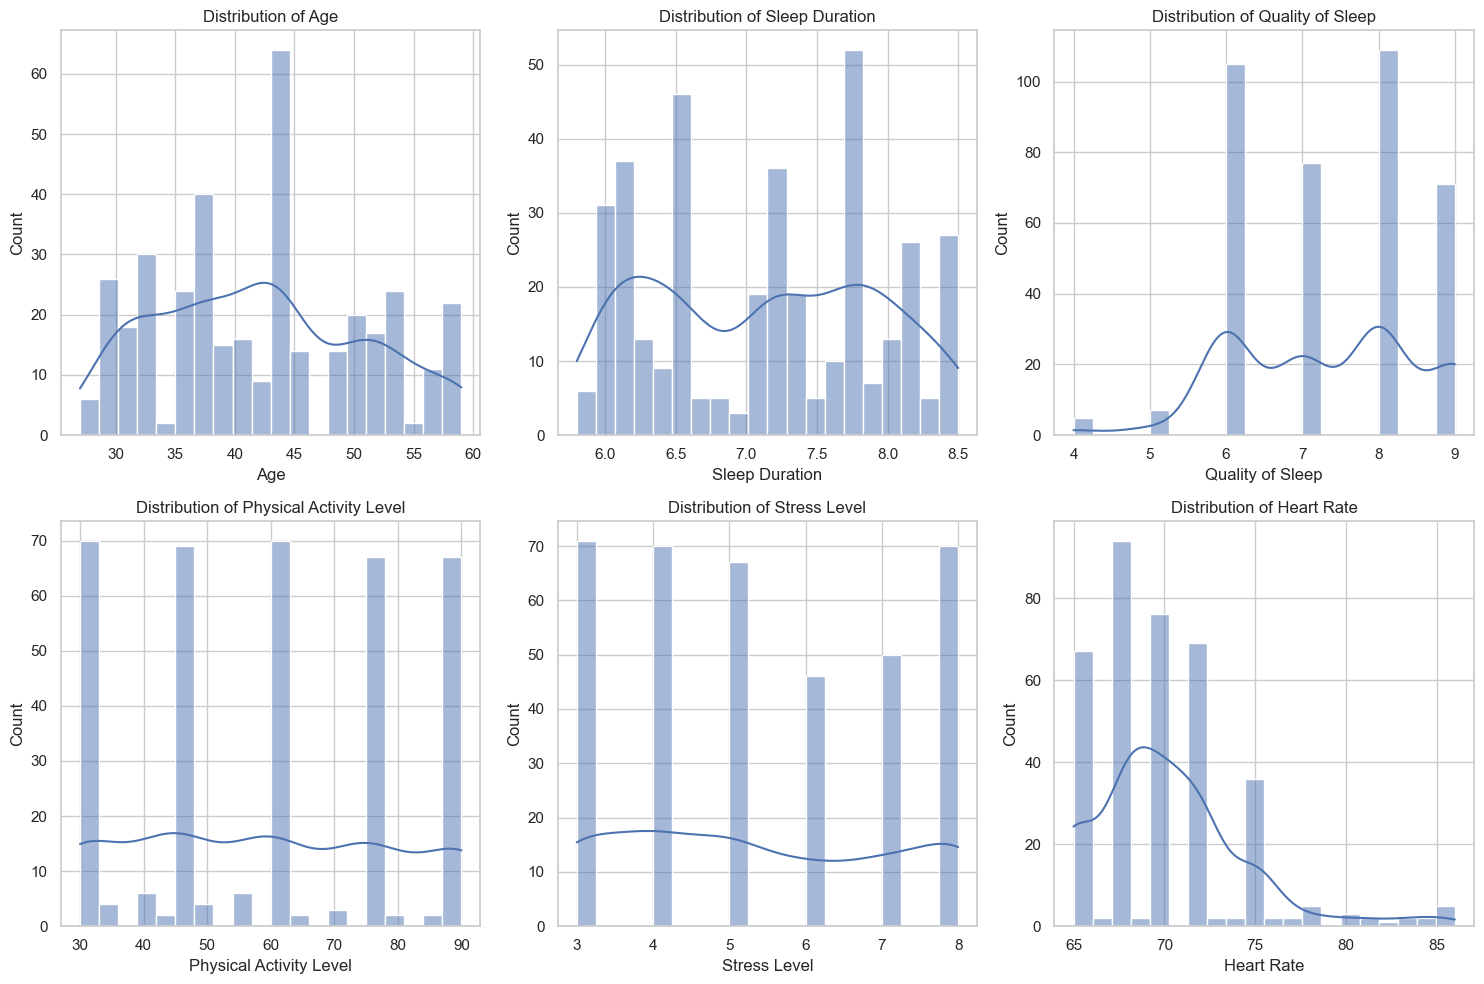

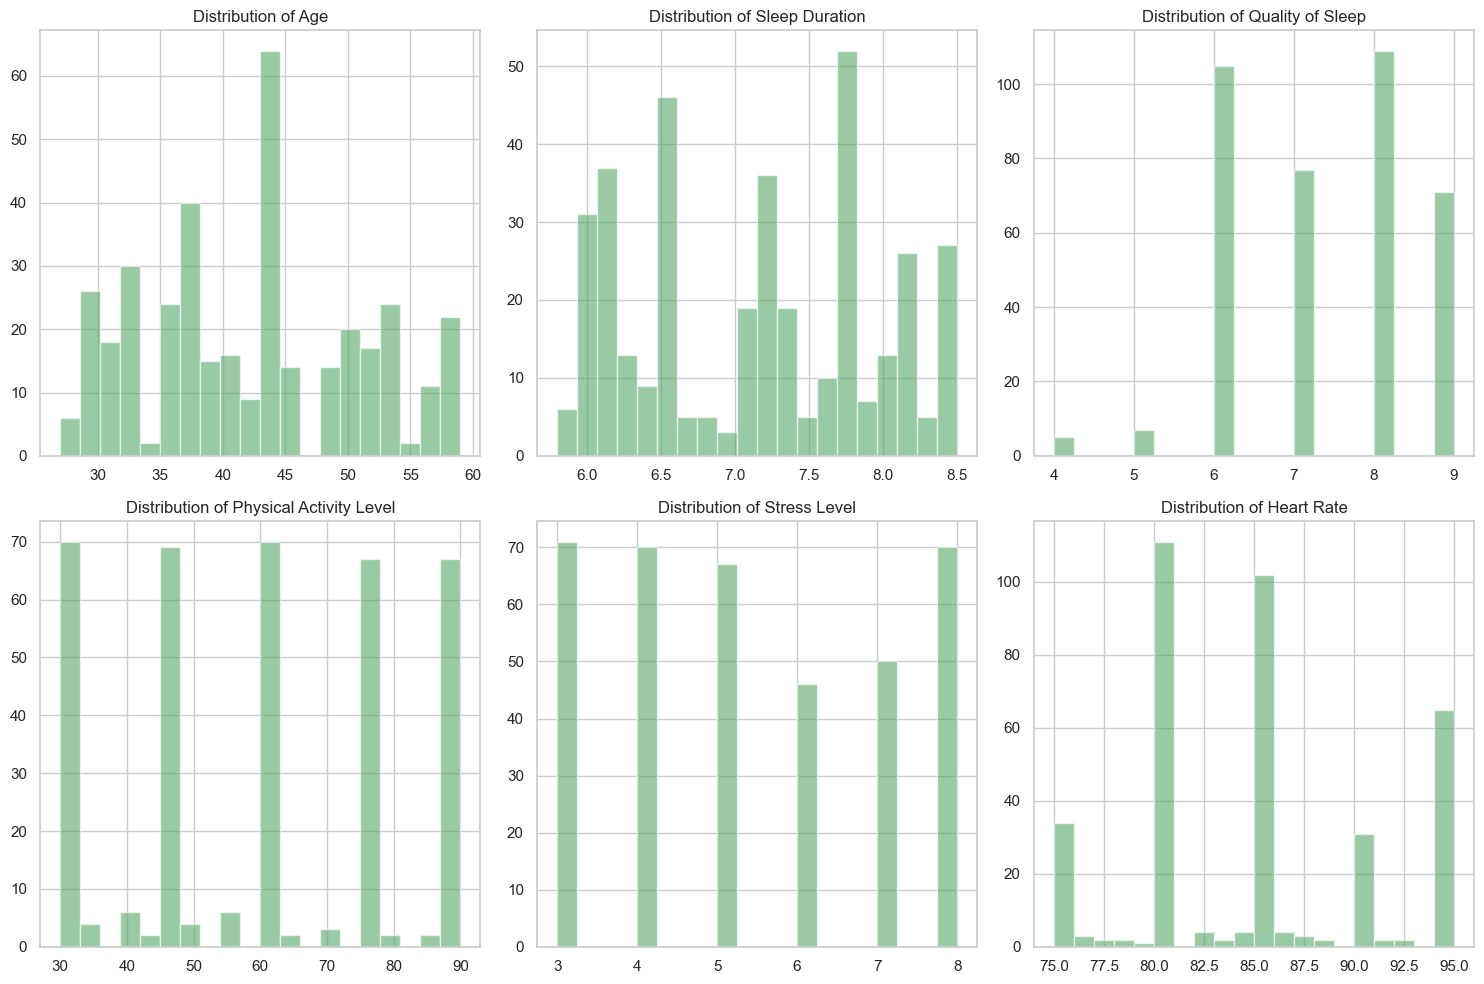

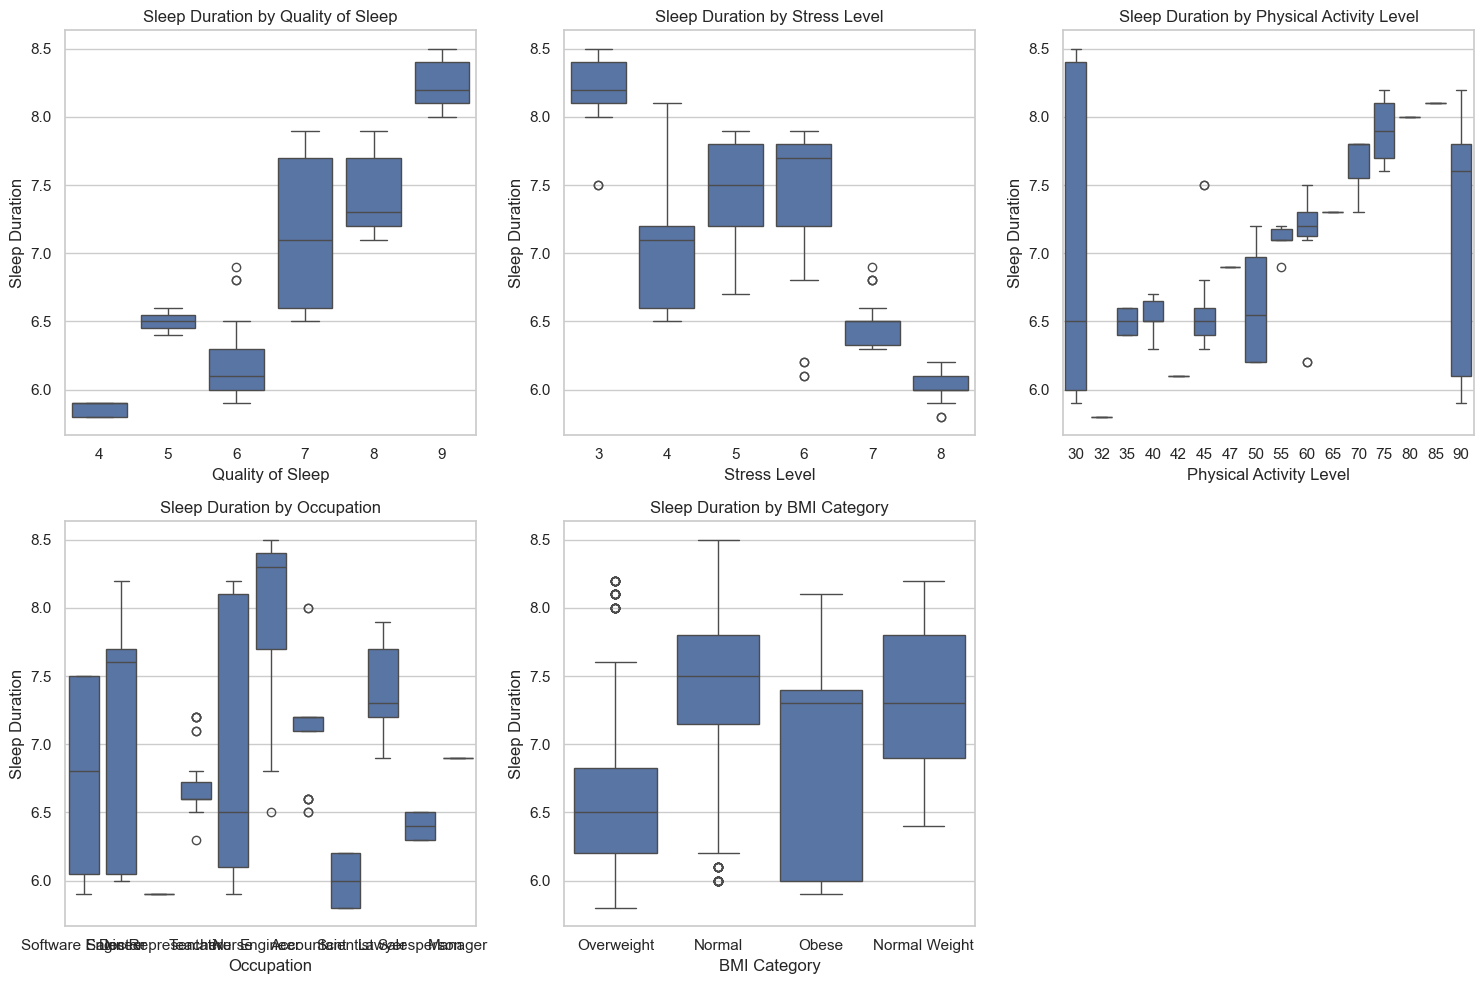

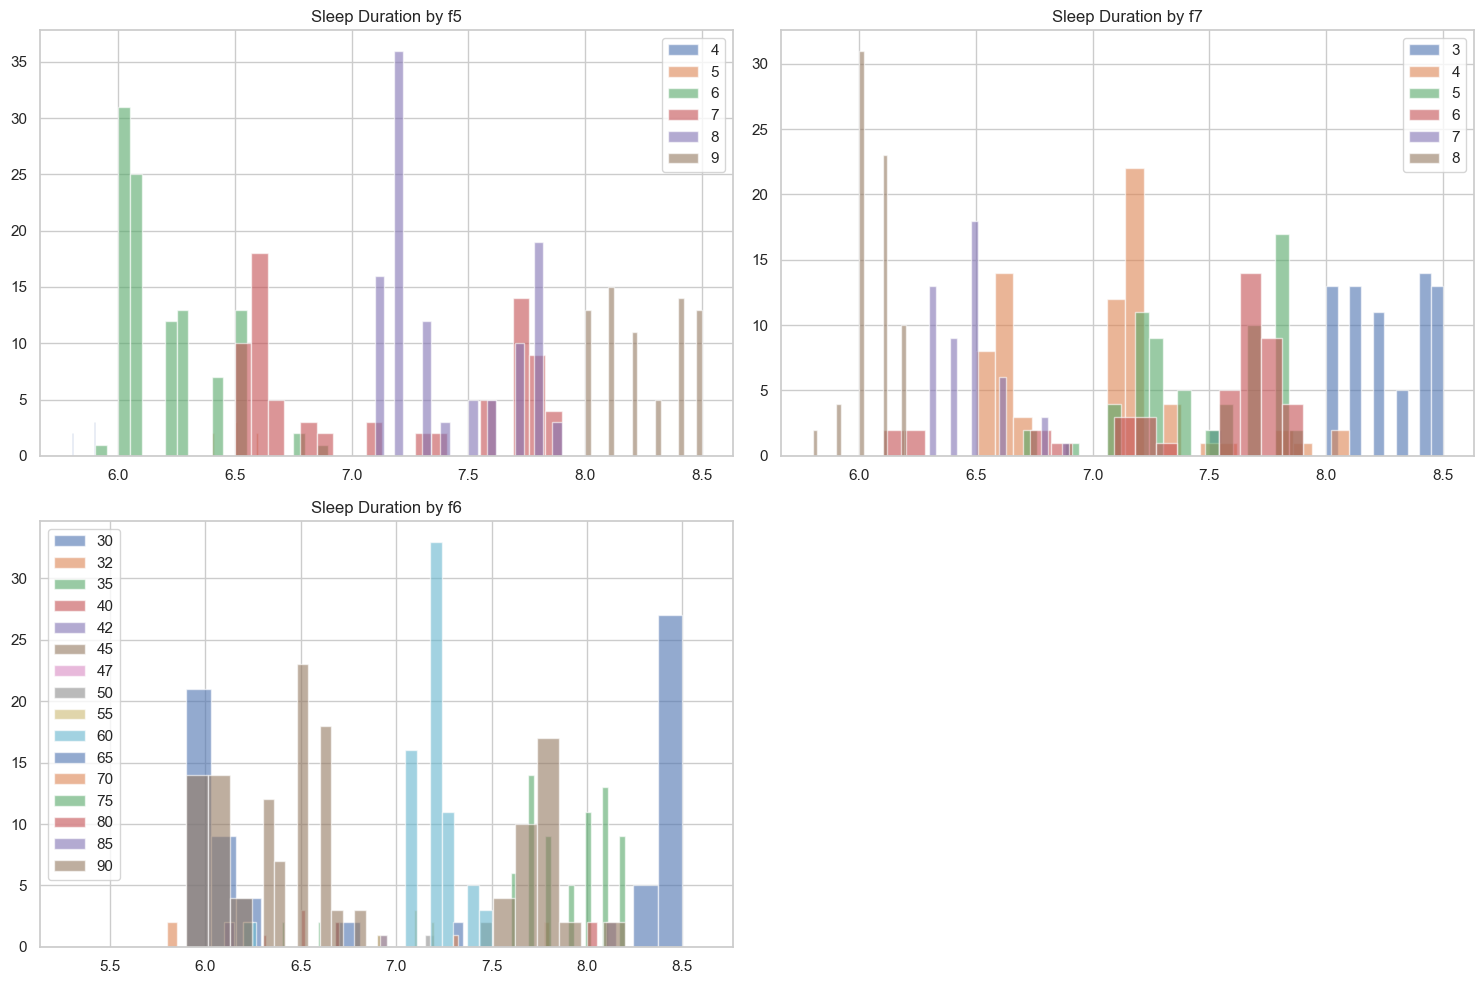

<Figure size 1500x1000 with 0 Axes>

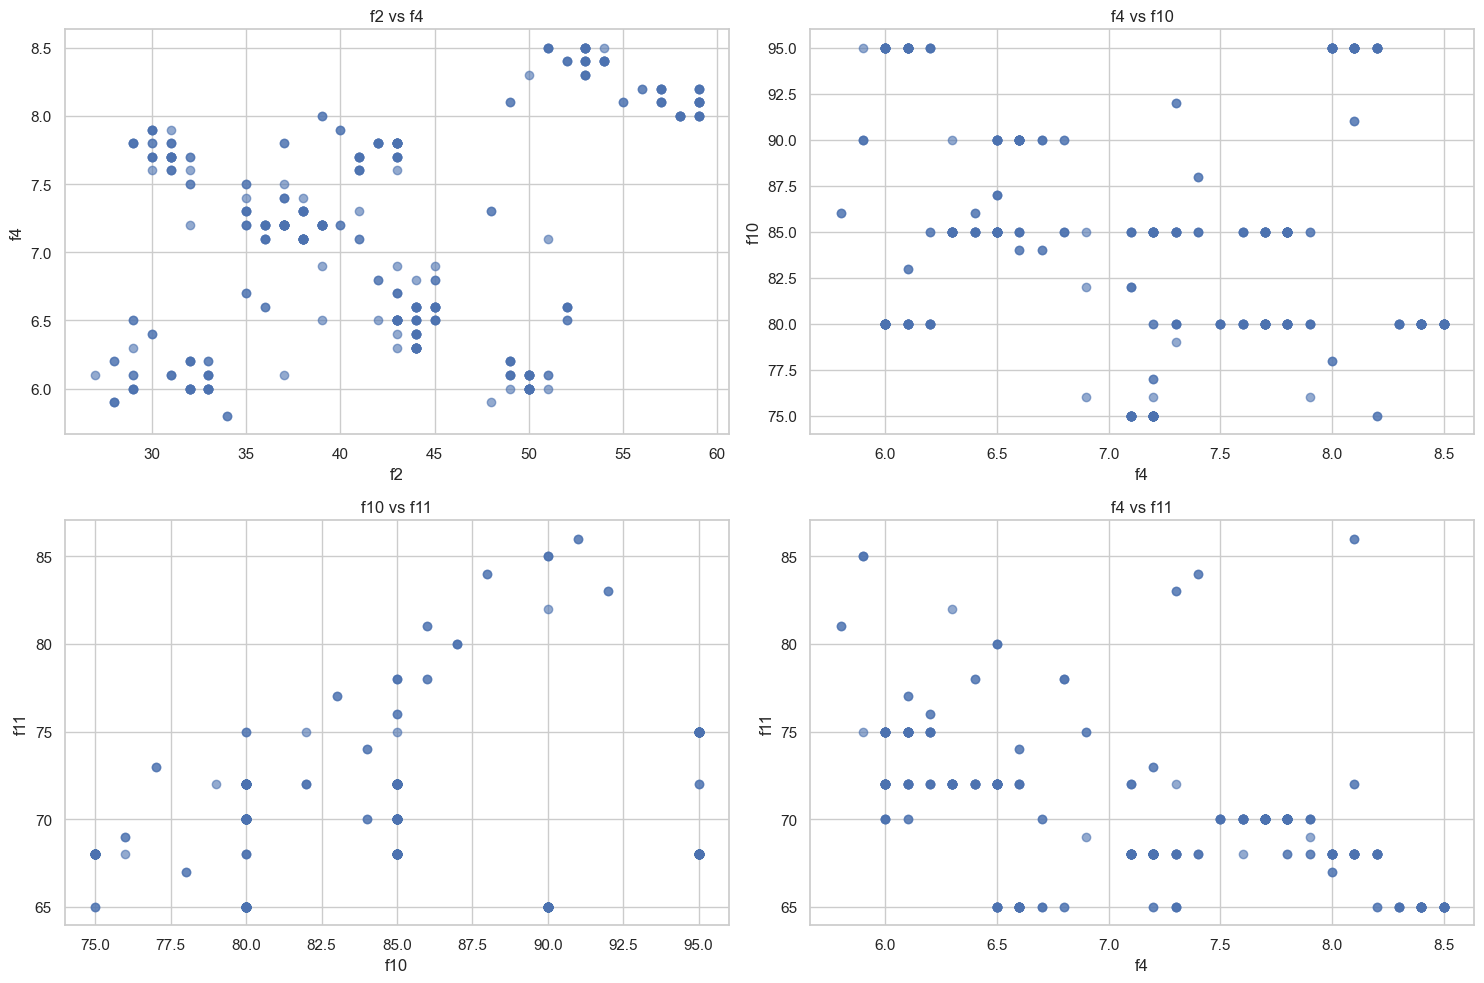

Time taken using Pandas: 0.0 seconds
Time taken using NumPy: 0.0 seconds


In [47]:
# Write your code for AIM #3 here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


sns.set_theme(style="whitegrid")

columns_to_plot = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

data = np.genfromtxt('sleep_health.csv', delimiter=',', skip_header=1, dtype=None, encoding='utf-8')

age = data['f2']  
sleep_duration = data['f4']  
quality_of_sleep = data['f5']  
physical_activity_level = data['f6']  
stress_level = data['f7']  
heart_rate = data['f10']  

columns_to_plot = {
    'Age': age,
    'Sleep Duration': sleep_duration,
    'Quality of Sleep': quality_of_sleep,
    'Physical Activity Level': physical_activity_level,
    'Stress Level': stress_level,
    'Heart Rate': heart_rate
}
plt.figure(figsize=(15, 10))
for i, (column_name, values) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(2, 3, i)
    plt.hist(values, bins=20, alpha=0.6, color='g')
    plt.title(f'Distribution of {column_name}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

categorical_vars = ['Quality of Sleep', 'Stress Level', 'Physical Activity Level', 'Occupation', 'BMI Category']

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[var], y=df['Sleep Duration'])
    plt.title(f'Sleep Duration by {var}')
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))

categorical_vars = ['f5', 'f7', 'f6']  
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    unique_values = np.unique(data[var])
    for value in unique_values:
        plt.hist(data[data[var] == value]['f4'], bins=20, alpha=0.6, label=value)  # 假设f4是睡眠时长
    plt.title(f'Sleep Duration by {var}')
    plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(15, 10))

relationships = [
    ('f2', 'f4'),  
    ('f4', 'f10'),  
    ('f10', 'f11'),  
    ('f4', 'f11'), 
]

plt.figure(figsize=(15, 10))
for i, (x_col, y_col) in enumerate(relationships, 1):
    plt.subplot(2, 2, i)
    x_data = data[x_col]
    y_data = data[y_col]
    plt.scatter(x_data, y_data, alpha=0.6)
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.show()


start_time_pandas = time.time()

end_time_pandas = time.time()
pandas_time = end_time_pandas - start_time_pandas


start_time_numpy = time.time()

end_time_numpy = time.time()
numpy_time = end_time_numpy - start_time_numpy


print(f"Time taken using Pandas: {pandas_time} seconds")
print(f"Time taken using NumPy: {numpy_time} seconds")

#To count unique values and their total count in a NumPy array, use 
# np.unique(array_name, return_counts=True)--- This will return two values, one is the unique values and the other is the total count of each unique value
# You will need this for plotting bar plots




# For box plots in NumPy you will need to 
# create a list of variable1, grouped by the unique value of some variable2 (nominal or ordinal), 
# Syntax: variable1_list = [variable1[variable2 == i] for i in np.unique(variable2)]


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



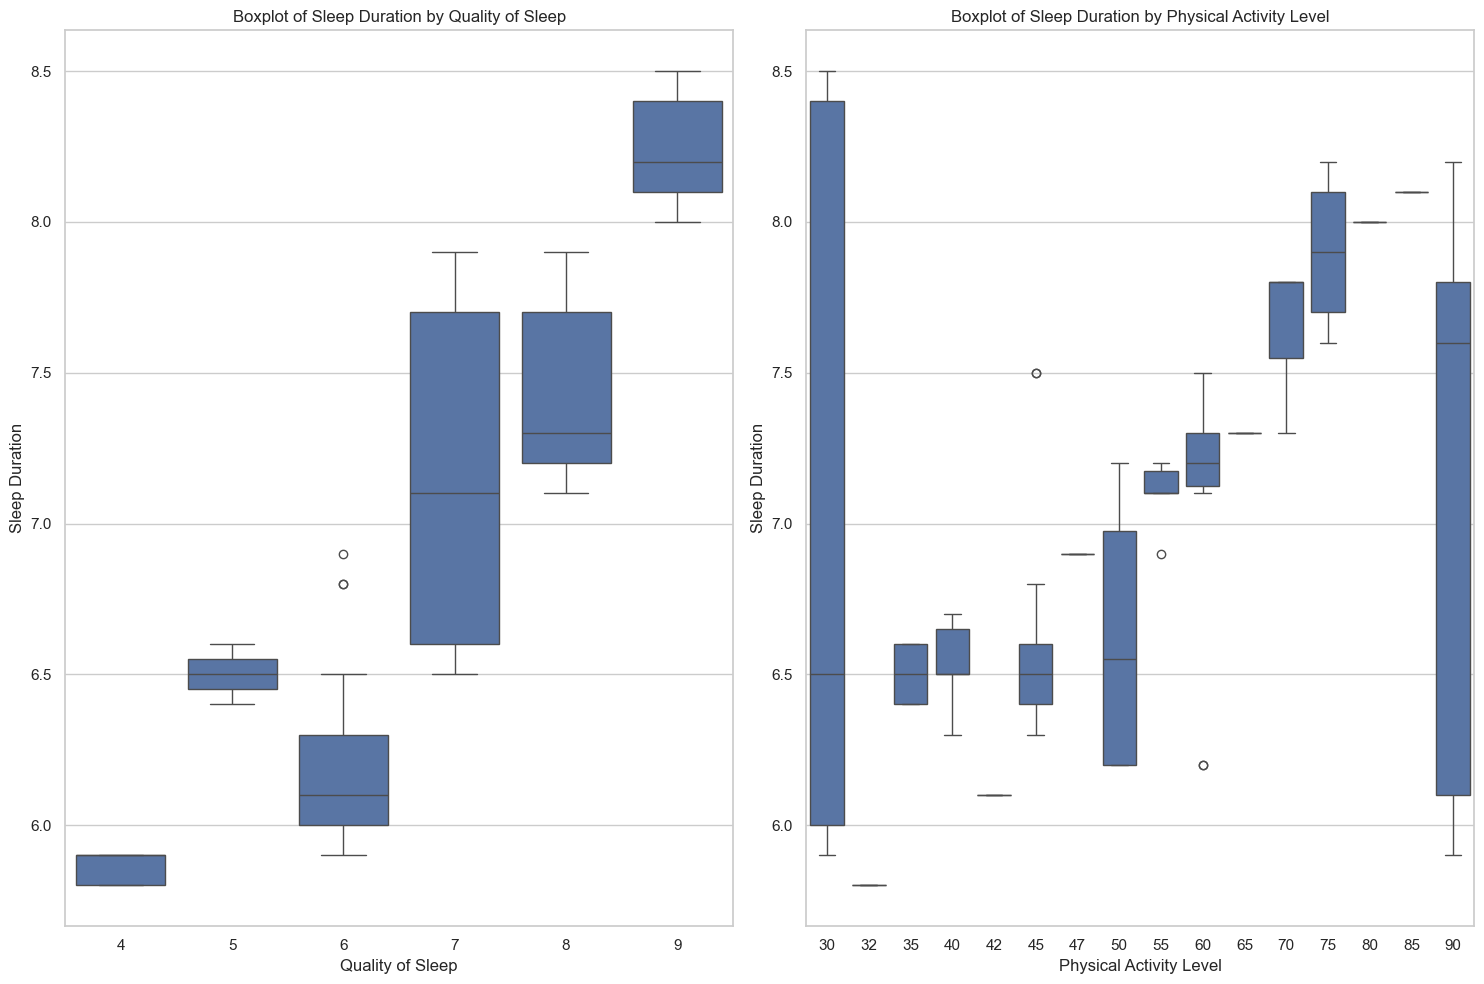

Person ID                     int64
Gender                       object
Age                           int64
Occupation                   object
Sleep Duration              float64
Quality of Sleep              int64
Physical Activity Level       int64
Stress Level                  int64
BMI Category                 object
Systolic blood pressure       int64
Diastolic blood pressure      int64
Heart Rate                    int64
Daily Steps                   int64
Sleep Disorder               object
dtype: object


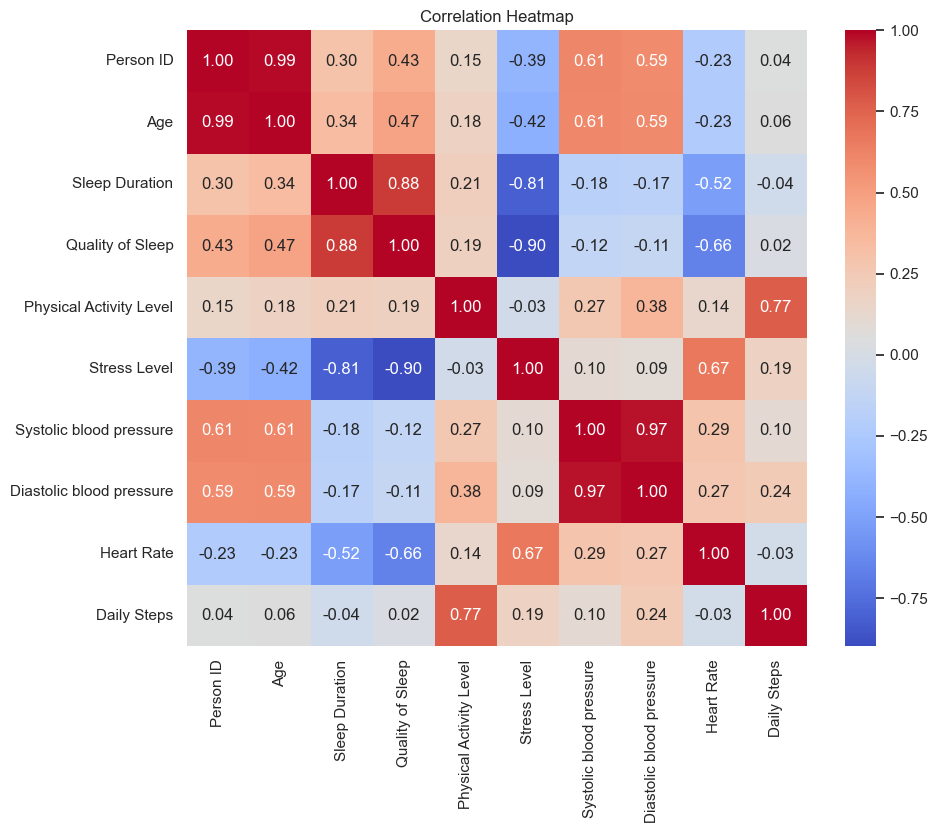

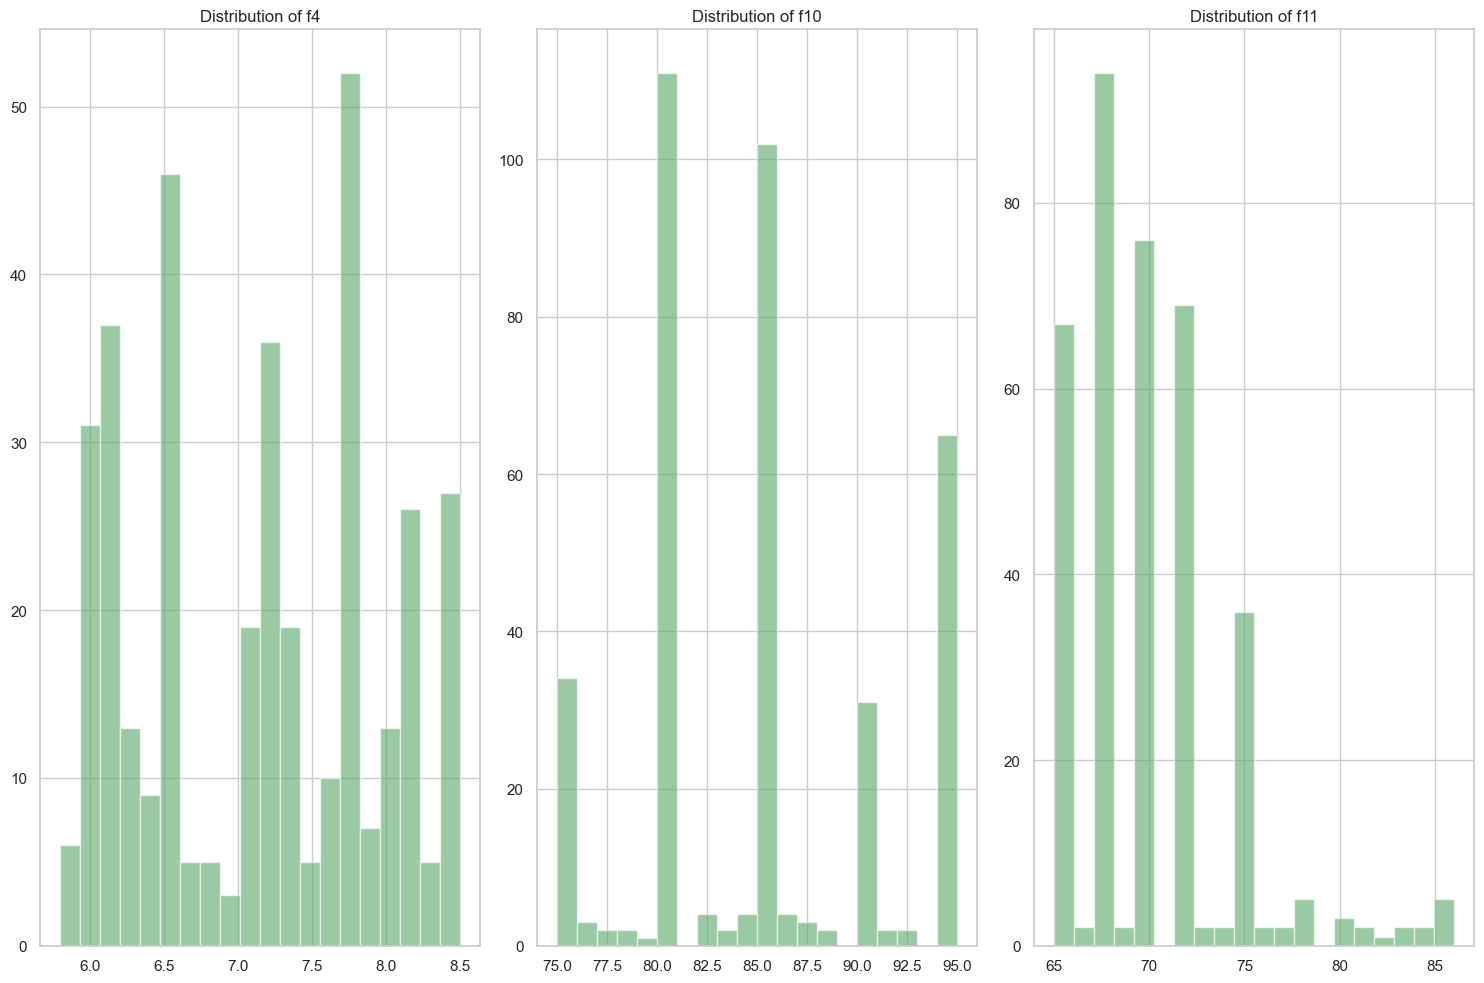

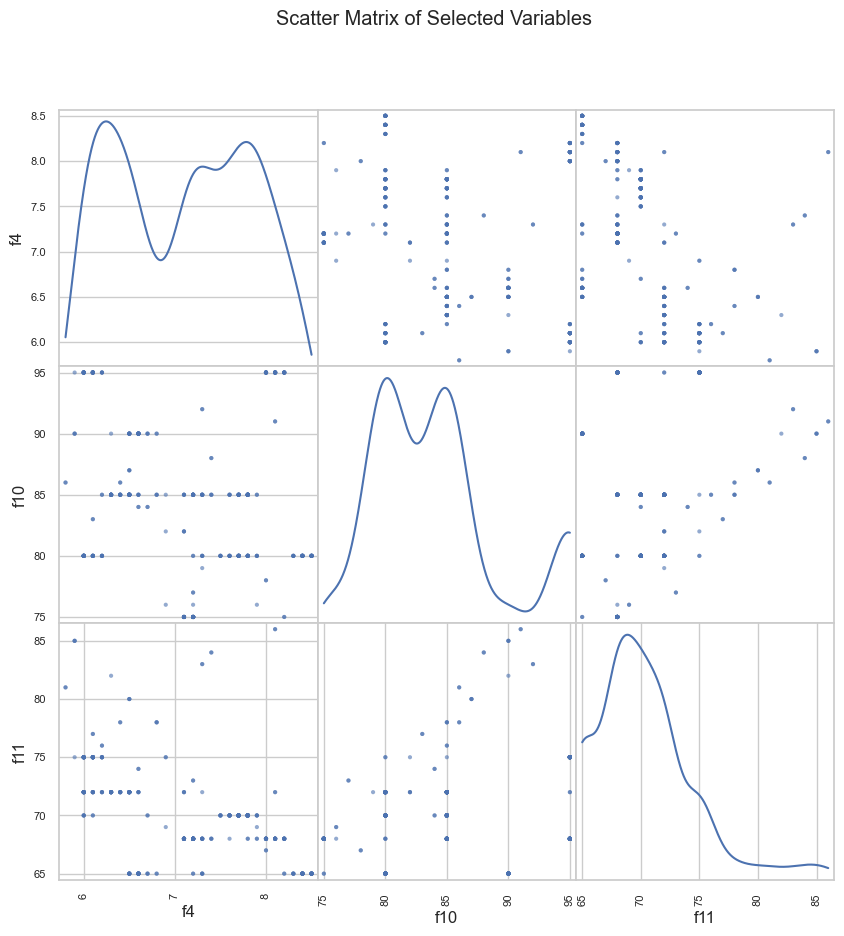

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Quality of Sleep', y='Sleep Duration', data=df)
plt.title('Boxplot of Sleep Duration by Quality of Sleep')
plt.subplot(1, 2, 2)
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df)
plt.title('Boxplot of Sleep Duration by Physical Activity Level')
plt.tight_layout()
plt.show()


print(df.dtypes)
df_numerical = df.select_dtypes(include=[np.number])
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


plt.figure(figsize=(15, 10))
for i, col in enumerate(['f4', 'f10', 'f11'], 1):
    plt.subplot(1, 3, i)
    plt.hist(data[col], bins=20, alpha=0.6, color='g')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

from pandas.plotting import scatter_matrix
df_np = pd.DataFrame(data)
scatter_matrix(df_np[['f4', 'f10', 'f11']], alpha=0.6, figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Selected Variables')
plt.show()
